In [72]:
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

import numpy as np
import pandas as pd

In [73]:
serial_results = pd.read_csv('../data/MMM_serial.csv', header=None)
openmp_results = pd.read_csv('../data/MMM_parallel.csv', header=None)
serial_results.rename(columns={0: '# Tasks', 1: 'Matrix Size', 2: 'Time'}, inplace=True)
openmp_results.rename(columns={0: '# Tasks', 1: 'Matrix Size', 2: 'Time'}, inplace=True)
serial_results_avg = serial_results.groupby(['# Tasks','Matrix Size'])['Time'].mean().reset_index()
openmp_results_avg = openmp_results.groupby(['# Tasks','Matrix Size'])['Time'].mean().reset_index()

In [74]:
def plot_restults(resutls,title,filename):
    groups = resutls.groupby('# Tasks')

    plt.figure(figsize=(8, 6))

    for name, group in groups:
        plt.plot(group['Matrix Size'], group['Time'], marker='o', label=name)

    plt.xlabel('Matrix Size')
    plt.ylabel('Time')
    plt.title(title)

    plt.grid(True)

    plt.legend(title='# Tasks')

    plt.savefig(filename)

    plt.show()

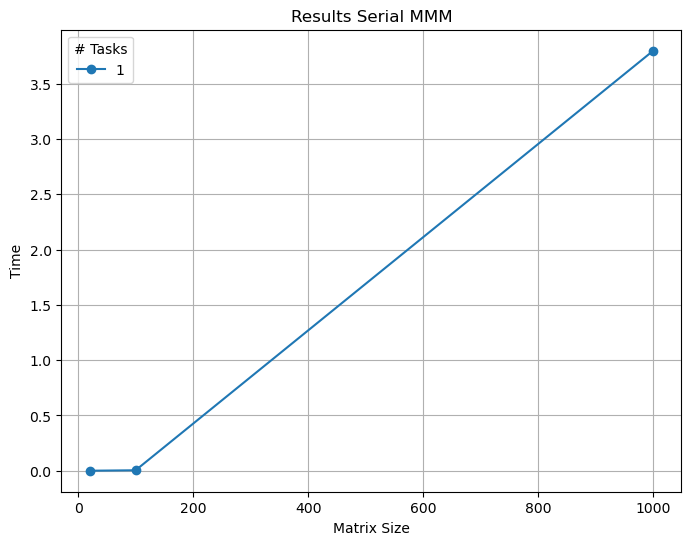

In [75]:
plot_restults(serial_results_avg,"Results Serial MMM","serial_results.jpg")

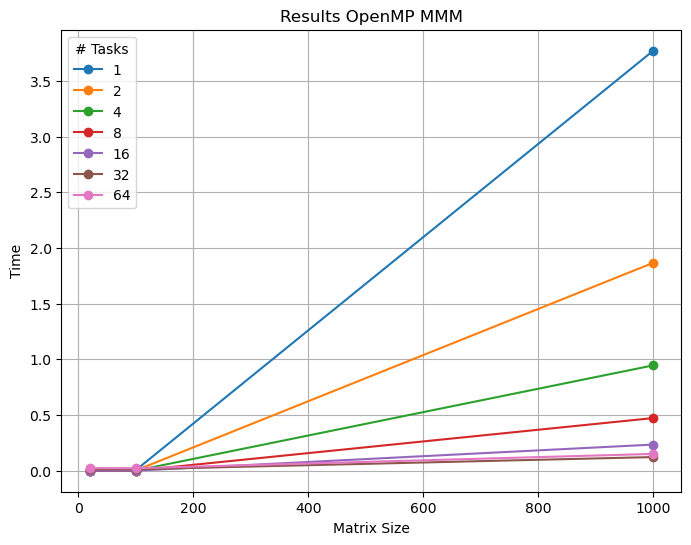

In [76]:
plot_restults(openmp_results_avg,"Results OpenMP MMM","openmp_results.jpg")